In [58]:
import numpy as np
from scipy.linalg import svd, norm
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

In [59]:
def plot(x, label=None, title=None, xlabel=None, ylabel=None, name=None):
    plt.figure()
    plt.rc('font',family='Times New Roman')
    plt.plot(x, label=label)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    if name != None:
        plt.savefig(name+'.png', dpi=200, format='png')

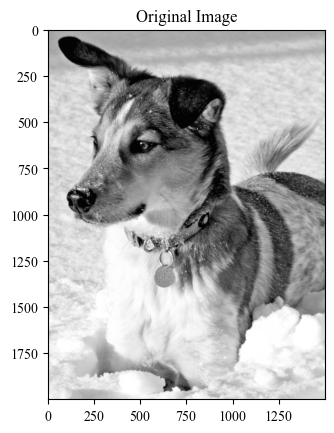

In [60]:
img = cv2.imread('dog.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure()
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.show()

U, S, V_T = svd(img, full_matrices=False)

In [61]:
frobenius_norm_original = norm(img, 'fro')

In [62]:
try:
    reconstruction_errors = np.load('reconstruction_errors.npy')
    variance_fraction = np.load('variance_fraction.npy')
    cumulative_sum_sv = np.load('cumulative_sum_sv.npy')
except FileNotFoundError:
    reconstruction_errors = []
    variance_fraction = []
    cumulative_sum_sv = np.cumsum(S)

    for r in tqdm(range(1, len(S) + 1), desc="Computing SVD"):
        img_reconstructed = U[:, :r] @ np.diag(S[:r]) @ V_T[:r, :]

        reconstruction_error = norm(img - img_reconstructed, 'fro') / frobenius_norm_original
        reconstruction_errors.append(reconstruction_error)

        fraction_missing_variance = reconstruction_error**2
        variance_fraction.append(fraction_missing_variance)

In [63]:
np.save('reconstruction_errors.npy', reconstruction_errors)
np.save('variance_fraction.npy', variance_fraction)
np.save('cumulative_sum_sv.npy', cumulative_sum_sv)

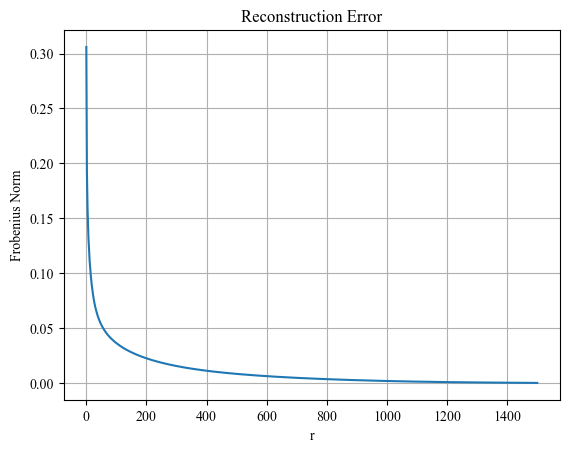

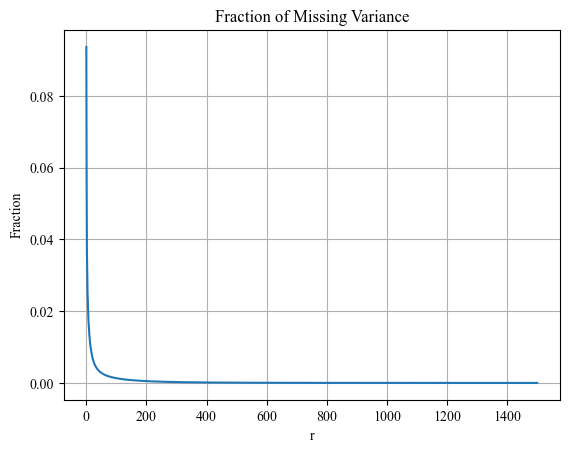

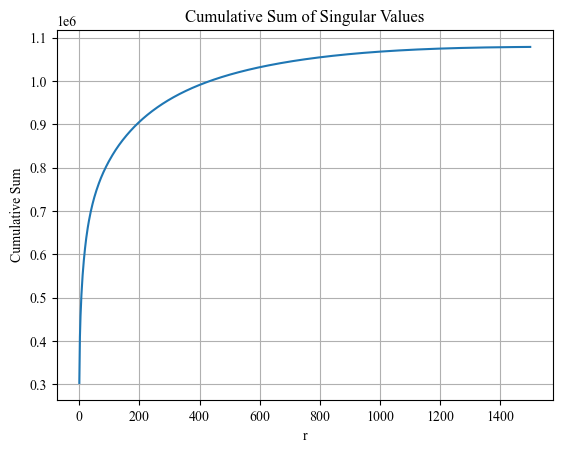

In [67]:
plot(reconstruction_errors, 'Reconstruction Error', 'Reconstruction Error', 'r', 'Frobenius Norm', 'pro_5_fro')
plot(variance_fraction, 'Variance Fraction', 'Fraction of Missing Variance', 'r', 'Fraction', 'missing')
plot(cumulative_sum_sv, 'Cumulative Sum of Singular Values', 'Cumulative Sum of Singular Values', 'r', 'Cumulative Sum', 'cumulative')

In [65]:
target_variance = 0.99

target_index_variance = np.argmax(np.array(variance_fraction) <= (1 - target_variance))
target_index_frobenius = np.argmax(np.array(reconstruction_errors) <= (1 - target_variance) * frobenius_norm_original)
target_index_cumulative_sum = np.argmax(cumulative_sum_sv >= target_variance * np.sum(S))

print(f"Rank for 99% Total Variance: {target_index_variance + 1}")
print(f"Rank for 99% Frobenius Norm: {target_index_frobenius + 1}")
print(f"Rank for 99% Cumulative Sum: {target_index_cumulative_sum + 1}")

Rank for 99% Total Variance: 16
Rank for 99% Frobenius Norm: 1
Rank for 99% Cumulative Sum: 1003


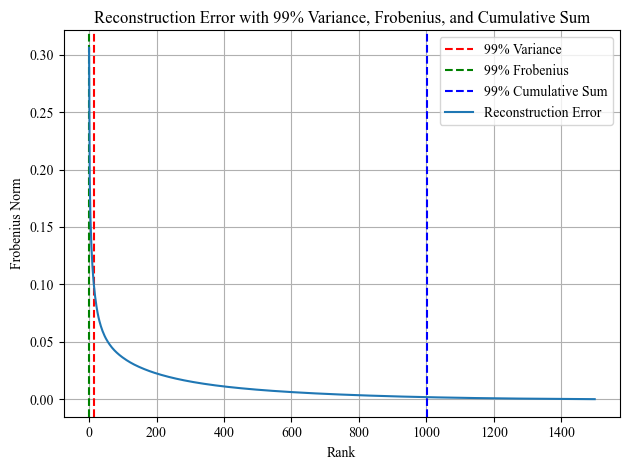

In [68]:
plt.figure()

plt.axvline(x=target_index_variance, color='r', linestyle='--', label='99% Variance')
plt.axvline(x=target_index_frobenius, color='g', linestyle='--', label='99% Frobenius')
plt.axvline(x=target_index_cumulative_sum, color='b', linestyle='--', label='99% Cumulative Sum')
plt.plot(reconstruction_errors, label='Reconstruction Error')
plt.title('Reconstruction Error with 99% Variance, Frobenius, and Cumulative Sum')
plt.xlabel('Rank')
plt.ylabel('Frobenius Norm')
plt.legend()

plt.tight_layout()
plt.grid()
plt.savefig('pro_5_5.png', dpi=200, format='png')